In [124]:
# Import packages and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

In [125]:
# Read the dataset
LifeExpectancy = pd.read_csv("Life Expectancy Data.csv")

# Clean column names (important because dataset has spaces)
LifeExpectancy.columns = LifeExpectancy.columns.str.strip()

# Drop rows with missing target value
print(f"Original rows: {len(LifeExpectancy)}")
LifeExpectancy = LifeExpectancy.dropna(subset=["Life expectancy"])
print(f"After dropping NaN targets: {len(LifeExpectancy)}")

# Drop Status column (categorical and not used)
LifeExpectancy = LifeExpectancy.drop(columns=["Status"], errors="ignore")

LifeExpectancy.head()


Original rows: 2938
After dropping NaN targets: 2928


,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [126]:
# Label Encoding for Country column (convert strings to numbers)
le = LabelEncoder()
LifeExpectancy["Country"] = le.fit_transform(LifeExpectancy["Country"])


In [127]:
# IQR method for outlier removal (ONLY on numeric columns)
numeric_df = LifeExpectancy.drop(columns=['Country', 'Status'], errors='ignore')

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

mask = ~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)

LifeExpectancy = LifeExpectancy.loc[mask]


In [128]:
# Divide the data into “Attributes” and “labels”
X = LifeExpectancy.drop(columns=["Life expectancy"], errors="ignore").select_dtypes(include=[np.number])
y = LifeExpectancy["Life expectancy"]

In [129]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [130]:
# Impute missing values (fit on train only)
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale features (fit on train only)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [131]:
# Create a Linear Regression model and fit it
regressor =LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [132]:
# Getting Results
print('Linear Model Coeff (m) =' , regressor.coef_)
print('Linear Model Coeff (b) =' , regressor.intercept_)

Linear Model Coeff (m) = [ 0.1956229   0.32470289 -1.37109479  2.78544792  0.18797166  0.3247191
 -0.35485809  0.1190429  -0.23151517 -3.01844251 -0.18611963  0.40898158
  0.62091681 -0.16434939 -0.33236561  0.05453282  0.356586   -0.84193678
  3.85910944 -0.64631754]
Linear Model Coeff (b) = 72.54630225080388


In [133]:
# Predicting the data
y_predict = regressor.predict(X_test)
print(y_predict)

[63.79412629 74.86695831 76.89055208 61.52940185 71.41774445 72.94718398
 68.14143113 64.2849193  80.04103711 65.71915306 72.50446238 75.52424877
 74.73143437 73.27508493 74.41966556 74.9897599  66.57771785 78.57430685
 78.27204915 75.57890663 73.90951414 74.89996768 74.64204502 73.10934427
 81.81640047 79.86673405 74.99441611 76.87746749 74.80634954 70.33370822
 76.30238777 65.08483445 78.34551419 69.08607347 72.29530358 76.03647884
 73.20532391 79.89325177 74.86322948 82.17469364 80.55575957 73.26210397
 74.22282051 70.78828799 74.12969425 78.51292428 73.94245434 66.56149497
 70.35559206 77.74205937 82.27939954 71.3027581  81.94441466 75.41929652
 74.88142159 71.55429084 76.40961406 74.37558793 74.02093545 80.14995248
 69.07953112 69.72316885 74.96654753 76.12333029 66.72390267 79.82902417
 74.39429007 79.67868798 71.05642548 70.64532721 71.7650395  75.91769044
 74.31816778 71.35952172 73.89874812 75.83809424 74.88509241 70.81800954
 80.91991623 76.36385016 73.95535549 72.731998   76

In [134]:
# Regression evaluation metrics
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)

Mean Squared Error (MSE): 7.358407757842968
Root Mean Squared Error (RMSE): 2.7126385232542445
Mean Absolute Error (MAE): 1.9779867609933406
R2 Score: 0.7447769493998009


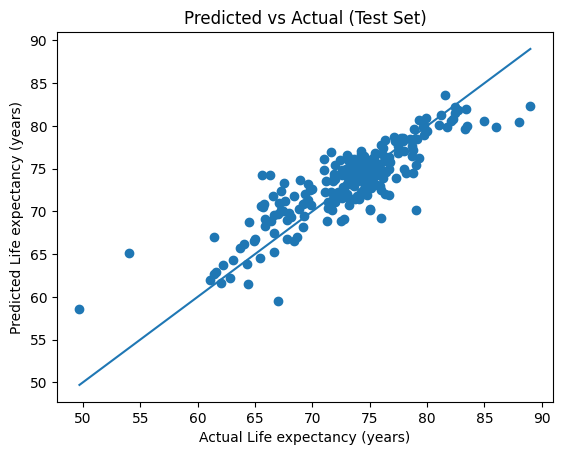

In [135]:
# Plot 1: Predicted vs Actual
plt.figure()
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Life expectancy (years)")
plt.ylabel("Predicted Life expectancy (years)")
plt.title("Predicted vs Actual (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()


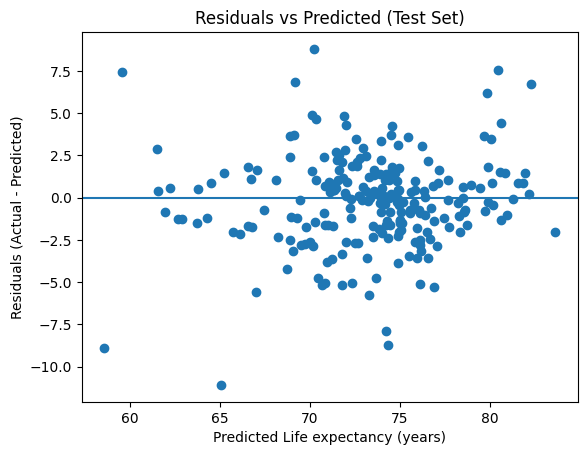

In [136]:
# Plot 2: Residuals plot
residuals = y_test - y_predict
plt.figure()
plt.scatter(y_predict, residuals)
plt.axhline(0)
plt.xlabel("Predicted Life expectancy (years)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted (Test Set)")
plt.show()
